In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

## SST

In [3]:
## Data for original cold and warm years

monthly_array_temp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      
# 
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               
# 
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [4]:
monthly_array_temp_slice[monthly_array_temp_slice == 0 ] = np.nan
monthly_array_temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_slicemean))

(14, 12)


/tmp/ipykernel_3223056/391916811.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)


In [5]:
## Data for Experiments 1 and 2


monthly_array_temp_exp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

          
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                

###             
## Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)


for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)



In [6]:
monthly_array_temp_exp_slice[monthly_array_temp_exp_slice == 0 ] = np.nan
monthly_array_temp_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_exp_slicemean))

(14, 12)


/tmp/ipykernel_3223056/2338418733.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'Degrees C')

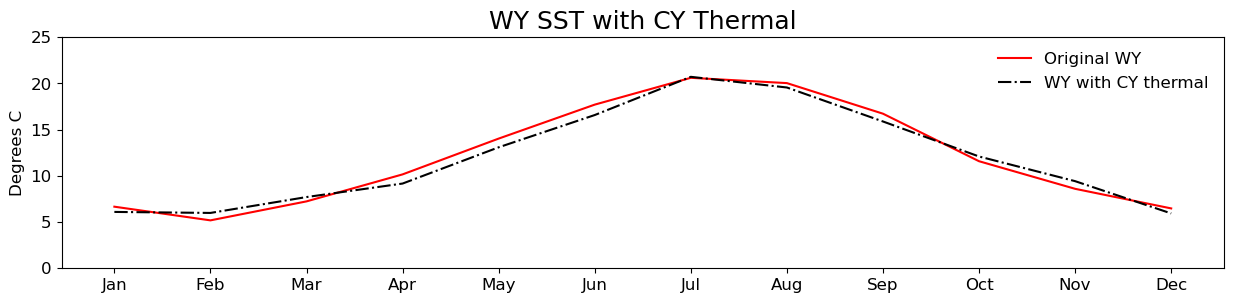

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_temp_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY thermal')


ax.set_title('WY SST with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [8]:
monthly_array_temp_exp_slicemean[12,:]

array([ 6.09901394,  5.98979208,  7.70769097,  9.1698652 , 13.09307022,
       16.58461295, 20.71957752, 19.56493846, 15.88781688, 12.09782938,
        9.42774859,  5.93728831])

Text(0, 0.5, 'Degrees C')

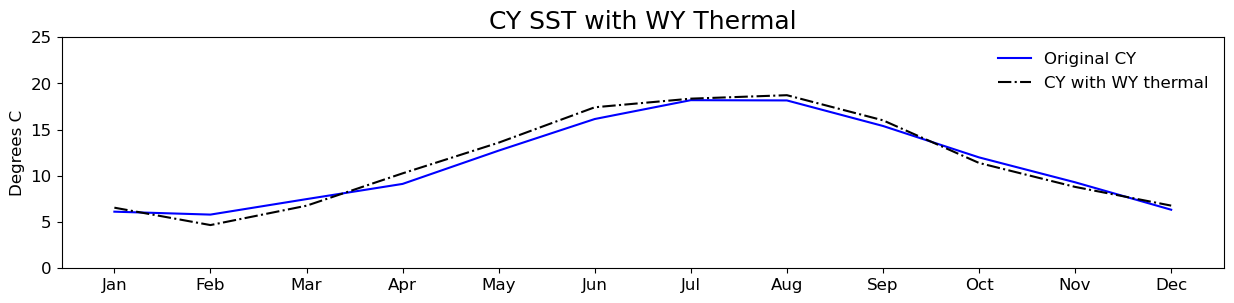

In [9]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_temp_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY thermal')


ax.set_title('CY SST with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [10]:
monthly_array_temp_exp_slicemean[1,:]

array([ 6.55805313,  4.6761362 ,  6.77186194, 10.27311911, 13.59493183,
       17.42428301, 18.35690238, 18.73194292, 16.01386188, 11.39800505,
        8.80717597,  6.78115408])

## Surface PAR

In [11]:
## PAR data for original years

monthly_array_PAR_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [12]:
monthly_array_PAR_slice[monthly_array_PAR_slice == 0 ] = np.nan
monthly_array_PAR_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_slicemean))

(14, 12)


/tmp/ipykernel_3223056/2771304440.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)


In [13]:
# PAR data for experiments 1 and 2

monthly_array_PAR_exp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

            
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
                
###               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)





In [14]:
monthly_array_PAR_exp_slice[monthly_array_PAR_exp_slice == 0 ] = np.nan
monthly_array_PAR_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_exp_slicemean))

(14, 12)


/tmp/ipykernel_3223056/178454329.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'uE/m$^{2}$/s')

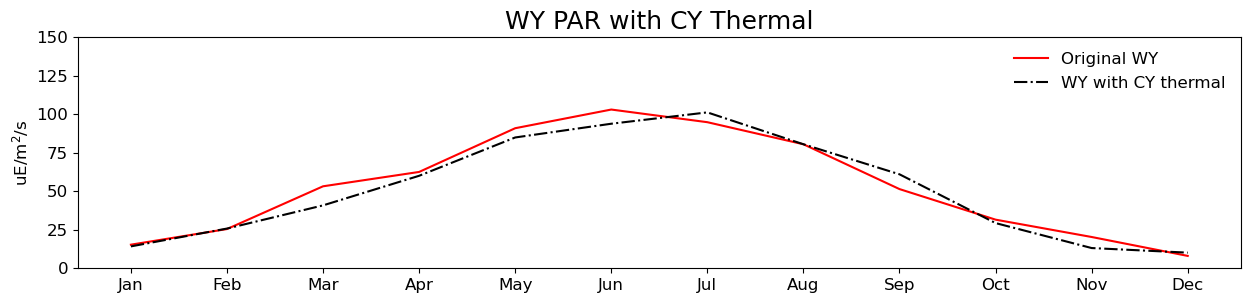

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_PAR_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY thermal')


ax.set_title('WY PAR with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('uE/m$^{2}$/s')

In [16]:
monthly_array_PAR_exp_slicemean[12,:]

array([ 14.21095929,  25.7881738 ,  40.84249474,  60.0591015 ,
        84.93951999,  93.86293186, 101.22744323,  80.5323536 ,
        61.02210488,  29.35150897,  13.13822587,  10.14679653])

Text(0, 0.5, 'uE/m$^{2}$/s')

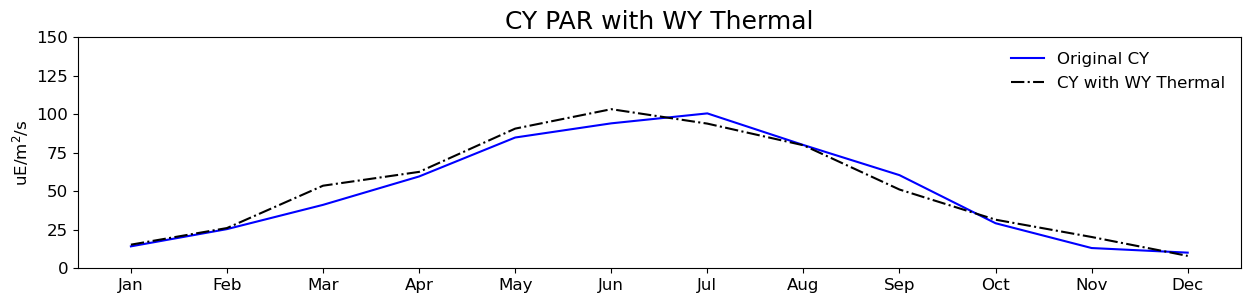

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_PAR_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY Thermal')


ax.set_title('CY PAR with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('uE/m$^{2}$/s')

In [18]:
monthly_array_PAR_exp_slicemean[1,:]

array([ 15.32649944,  26.11869233,  53.62521119,  62.5976493 ,
        90.68618976, 103.30374366,  93.93976964,  79.87383634,
        51.12972378,  31.54723225,  20.31534137,   8.03696216])

## Halocline Strength

In [19]:

# Halocline Strength data for original years


monthly_array_halocline_depth_orig_SSslice = np.zeros([14,12,50,50])
monthly_array_halocline_strength_orig_SSslice = np.zeros([14,12,50,50])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [20]:
monthly_array_halocline_strength_orig_SSslice[monthly_array_halocline_strength_orig_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_orig_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_orig_SSslicemean))

(14, 12)


/tmp/ipykernel_3223056/1288103633.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)


In [21]:
# Data for Experiments 1 and 2

monthly_array_halocline_depth_SSslice = np.zeros([14,12,50,50])
monthly_array_halocline_strength_SSslice = np.zeros([14,12,50,50])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']

# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
 
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [22]:
monthly_array_halocline_strength_SSslice[monthly_array_halocline_strength_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_SSslicemean))

(14, 12)


/tmp/ipykernel_3223056/3661973807.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)


Text(0, 0.5, 'g/kg m$^{-1}$')

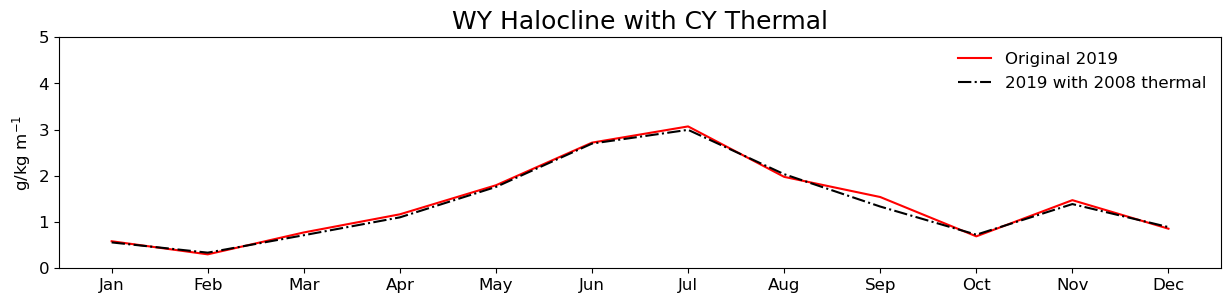

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 thermal')


ax.set_title('WY Halocline with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

In [24]:
monthly_array_halocline_strength_SSslicemean[12,:]

array([0.55982106, 0.33795863, 0.71550134, 1.10226626, 1.76050025,
       2.69903492, 2.99644459, 2.0364869 , 1.33602564, 0.72712177,
       1.38972946, 0.89137146])

Text(0, 0.5, 'g/kg m$^{-1}$')

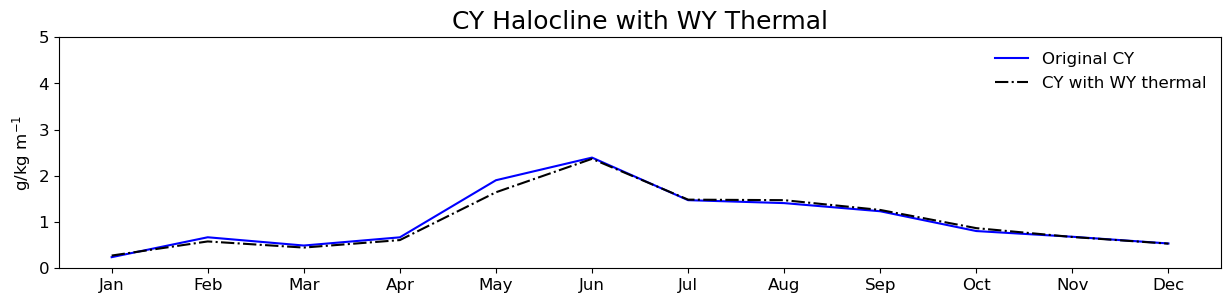

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[1,:],color='k',linestyle='-.',label='CY with WY thermal')


ax.set_title('CY Halocline with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

### Depth-averaged Nutrients (0-10m)

In [26]:

### Nitrate data for original cold and warm years


monthly_array_nitrate_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [27]:
monthly_array_nitrate_orig_slice[monthly_array_nitrate_orig_slice == 0 ] = np.nan
monthly_array_nitrate_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223056/3312634990.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)


In [28]:

### Silicon data for original cold and warm years

monthly_array_silicon_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

   
 ### 
## Experimental Year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


       



In [29]:
monthly_array_silicon_orig_slice[monthly_array_silicon_orig_slice == 0 ] = np.nan
monthly_array_silicon_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223056/241793216.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)


In [30]:

### Nitrate data for Experiments 1 and 2

monthly_array_nitrate_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                


# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

     
        # # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [31]:
monthly_array_nitrate_depthint_slice[monthly_array_nitrate_depthint_slice == 0 ] = np.nan
monthly_array_nitrate_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223056/231329215.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)


In [32]:

### Silicon data for Experiments 1 and 2


monthly_array_silicon_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

 # Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

         

# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [33]:
monthly_array_silicon_depthint_slice[monthly_array_silicon_depthint_slice == 0 ] = np.nan
monthly_array_silicon_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223056/3737416097.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-3}$')

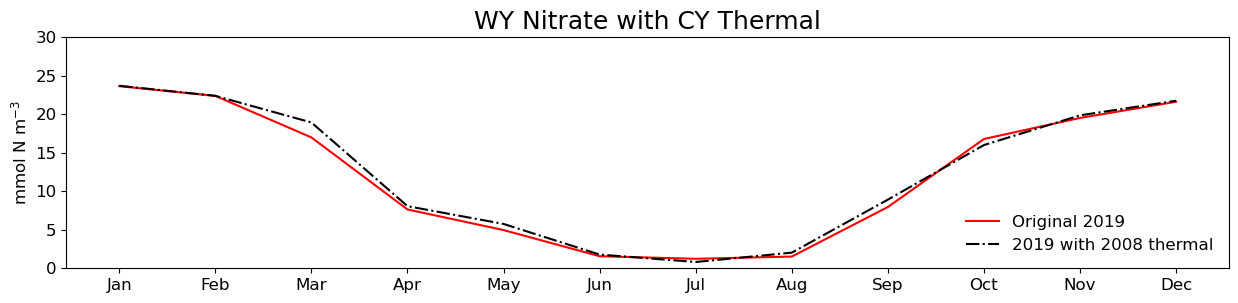

In [34]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 thermal')


ax.set_title('WY Nitrate with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-3}$')

In [35]:
monthly_array_nitrate_orig_slicemean[12,:]

array([23.64834195, 22.38691698, 16.99383033,  7.63730902,  4.96273598,
        1.56547187,  1.23107567,  1.5230891 ,  7.95614177, 16.79074658,
       19.52305174, 21.62759183])

In [36]:
monthly_array_nitrate_depthint_slicemean[12,:]

array([23.70228905, 22.39409214, 18.93542225,  8.06537268,  5.75761214,
        1.78122465,  0.81580702,  2.03092249,  8.91424762, 16.00387333,
       19.86077911, 21.75788525])

Text(0, 0.5, 'mmol Si m$^{-3}$')

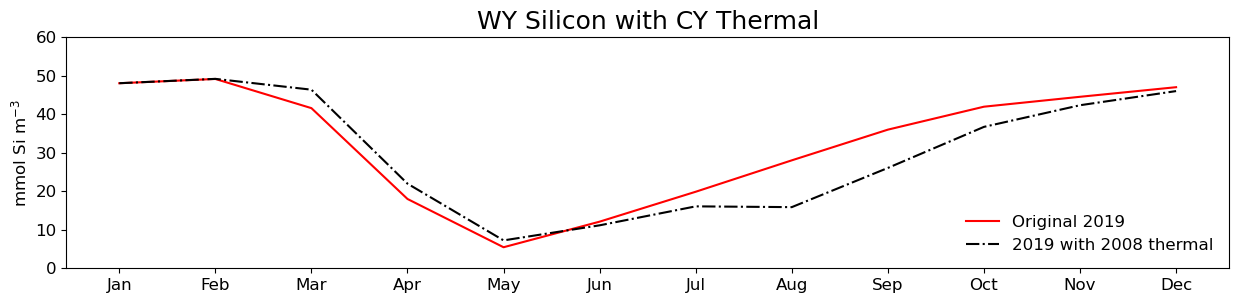

In [37]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 thermal')


ax.set_title('WY Silicon with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol Si m$^{-3}$')

In [38]:
monthly_array_silicon_orig_slicemean[12,:]

array([48.06238141, 49.17238747, 41.59249494, 18.0018168 ,  5.46358173,
       12.1107789 , 19.87997362, 28.03714477, 36.00806573, 41.96864256,
       44.54149611, 47.0336623 ])

In [39]:
monthly_array_silicon_depthint_slicemean[12,:]

array([48.06739732, 49.19871481, 46.38849762, 21.98268465,  7.24247022,
       11.15793683, 16.08159249, 15.88039615, 26.06336839, 36.72660236,
       42.34819421, 46.02331588])

Text(0, 0.5, 'mmol N m$^{-3}$')

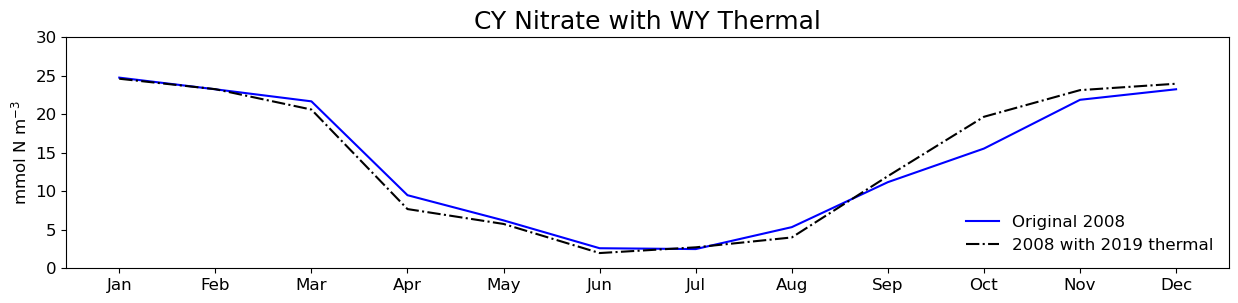

In [40]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 thermal')


ax.set_title('CY Nitrate with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-3}$')

In [41]:
monthly_array_nitrate_depthint_slicemean[1,:]

array([24.61595001, 23.26098825, 20.61280733,  7.68941071,  5.75685816,
        1.97729292,  2.72072923,  4.003872  , 11.9685279 , 19.67454109,
       23.13616984, 23.96606766])

Text(0, 0.5, 'mmol Si m$^{-3}$')

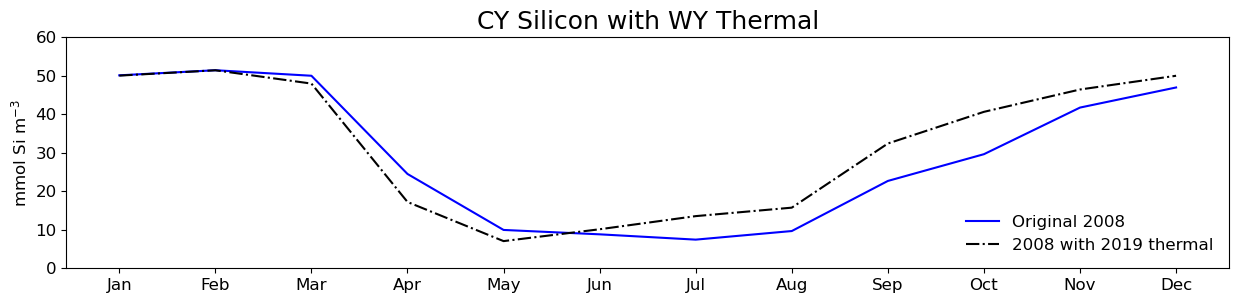

In [42]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 thermal')


ax.set_title('CY Silicon with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol Si m$^{-3}$')

In [43]:
monthly_array_silicon_depthint_slicemean[1,:]

array([50.04129223, 51.42741271, 47.97131586, 17.22230011,  7.05583654,
       10.13642248, 13.54628137, 15.74654144, 32.40864067, 40.63494107,
       46.43542205, 50.00465601])

## Depth-integrated 0-100 m Diatoms

In [44]:

### Diatom data for original years

monthly_array_diatoms_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 using higher temperature threshold       
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

                
### 2019 using higher temperature threshold                
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)




In [45]:
monthly_array_diatoms_orig_slice[monthly_array_diatoms_orig_slice == 0 ] = np.nan
monthly_array_diatoms_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223056/3403781678.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)


In [46]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_Thrml19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)


        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_Thrml08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)


        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [47]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223056/2320522072.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-2}$')

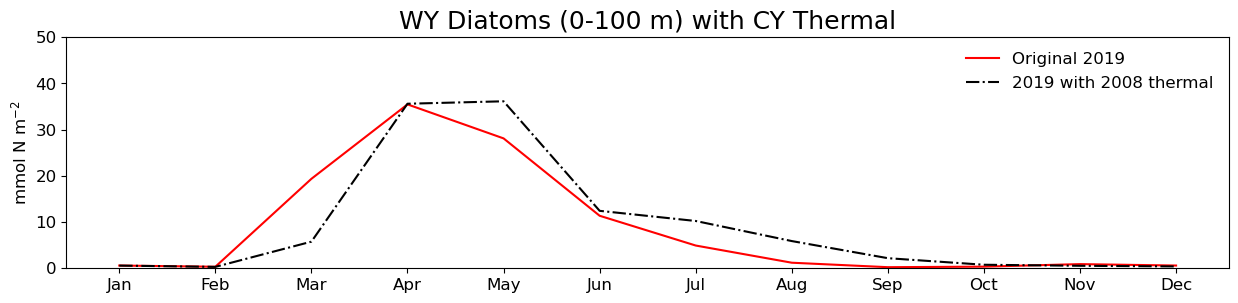

In [48]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 thermal')


ax.set_title('WY Diatoms (0-100 m) with CY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')

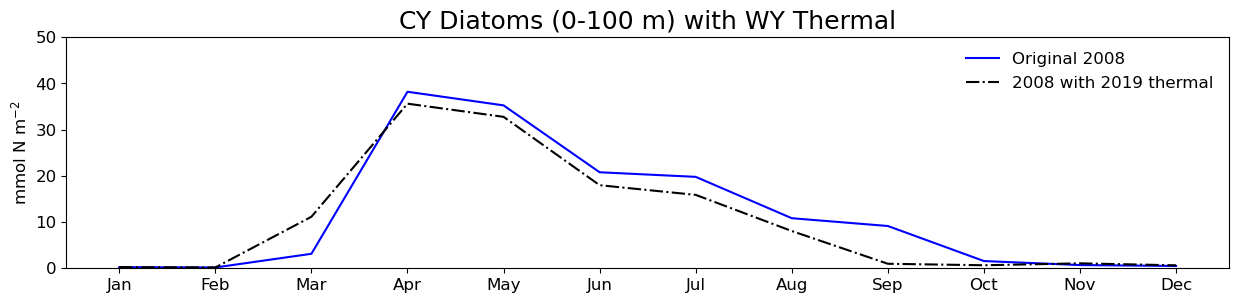

In [49]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 thermal')


ax.set_title('CY Diatoms (0-100 m) with WY Thermal',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')

In [50]:
monthly_array_diatoms_depthint_slicemean[1,:]

array([ 0.24531845,  0.1722018 , 11.15381515, 35.62884681, 32.77864728,
       17.98166513, 15.88818571,  8.06120314,  0.97470466,  0.65459443,
        1.07020377,  0.641704  ])